 # The Goal:
 ## Create a model that given a level in our business can give the correct salary.
 This exericse serves as a way to learn the basics of support vector regression.

 ## Imports.

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

 ## Importing the dataset.

In [80]:
dataset = pd.read_csv('Position_Salaries.csv')

 ## Spliting data into independent variables (X) and dependent variables (y).
 We don't use the Position feature as an independent variable because it is simply a label for the Level feature.
 Note that the only reason are converting the features to float is to avoid a warning later in the code.

In [81]:
X = pd.DataFrame(dataset['Level'], columns=['Level']).apply(lambda x: x.astype(float))
y = pd.DataFrame(dataset['Salary'], columns=['Salary']).apply(lambda x: x.astype(float))

 ## Here's X

In [82]:
X

Level
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
8    9.0
9   10.0

 ## Here's y

In [83]:
y

Salary
0    45000.0
1    50000.0
2    60000.0
3    80000.0
4   110000.0
5   150000.0
6   200000.0
7   300000.0
8   500000.0
9  1000000.0

 ## Note:
 #### We do not split the data into training and testing data.
 We don't have enough data to split it and still make accurate predictions.
 This does raise a concern about overfitting.
 Furthermore, this is simply an exercise in understanding SVR and feature scaling.

 ## Now we will apply feature scaling.
 ### We are using the standardization method for our scaling.
 As you can see above, the Level feature's values are much higher than the Salary feature's values.
 This means they need to be scaled so that the Salary feature doesn't dominate the model.
 Many libraries' implementations of machine learning models take care of feature scaling silently, but scikit-learn's SVR does not.

In [84]:
standard_scaler_x = StandardScaler()
standard_scaler_y = StandardScaler()
X = standard_scaler_x.fit_transform(X)
y = standard_scaler_y.fit_transform(y)

 ## Fitting a support vector regression model to the dataset.
 We are using a radial basis function kernel for this data as it allows us to show both SVR and feature scaling.

In [85]:
svr = SVR(kernel='rbf')
svr.fit(X, y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

 The .ravel() is simply to flatten y as the fit method expects a 1d array.

 ## Getting our predictions.

In [86]:
predictions = svr.predict(X)

 ## Let's take a look.

In [87]:
pd.DataFrame(predictions, columns=['Salary'])

Salary
0 -0.619785
1 -0.629247
2 -0.567890
3 -0.497322
4 -0.446903
5 -0.366172
6 -0.141156
7  0.285577
8  0.782265
9  1.085598

 We can see that our predictions are scaled because of our feature scaling.

 ## Let's make them more understandable.
 We can do that with inverse_transform method to convert our predictions into the original Salary range.

In [88]:
predictions = standard_scaler_y.inverse_transform(predictions)
pd.DataFrame(predictions, columns=['Salary'])

Salary
0   73474.156157
1   70786.945846
2   88213.009021
3  108254.985750
4  122574.522506
5  145503.106886
6  209410.231329
7  330606.892046
8  471671.955873
9  557821.758999

 ## Let's see our mean absolute error.
 We have to use inverse_transform once again, this time on our y vector.

In [89]:
mae = mean_absolute_error(predictions,standard_scaler_y.inverse_transform(y))
mae

63332.39208968966

 This isn't great, but a lot of this error is being caused by the Level 10, $1,000,000 Salary observation.
 SVR treats the level 10 as an outlier, in testing removing the level 10 observation dropped our mae by over 50%.
 It is not acceptable to simply remove the "outlier" as we know it is legitimate data.

 ## Now let's visualize the results.

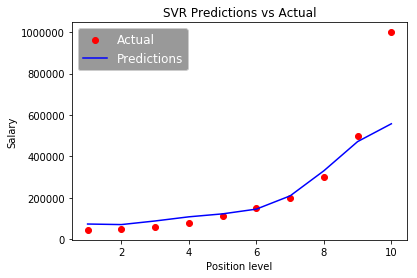

In [90]:
X = standard_scaler_x.inverse_transform(X)
y =standard_scaler_y.inverse_transform(y)
fig = plt.figure()
ax = fig.add_subplot(111)

actual = ax.scatter(X, y, color = 'red')
pred = ax.plot(X, predictions, color = 'blue')

ax.set_title('SVR Predictions vs Actual',color='black')
ax.set_facecolor('white')

ax.set_xlabel('Position level',color='black')
ax.set_ylabel('Salary',color='black')

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

ax.legend((actual,pred[0]),('Actual','Predictions'),facecolor='grey',loc='upper left', fontsize=12)
plt.show()

 Here we can really see how the model is treating the Level 10 observation as an outlier.
 We can also see that SVR using the rbf kernel is probably not the best choice.
 In testing SVR with a poly kernel on a non feature scaled set of data preformed better.

 ### Note
 The Position_Salaries.csv was taken from the Machine Learning A-Z™: Hands-On Python & R In Data Science course offered on Udemy.
 This served as an exercise for me to learn what SVR is and how to implement it.